In [2]:
import numpy as np
import sys 

sys.path.append("/users/tom/git/neon_blink_detection/")
sys.path.append("/users/tom/git/neon_blink_detection/src")

from training.video_loader import video_loader
from src.helper import OfParams, AugParams

of_params = OfParams()
aug_params = AugParams()

rec = video_loader(of_params, aug_params)
clip_names = np.load("/users/tom/git/neon_blink_detection/clip_list.npy")


In [3]:
clip_names_test = [
    "2023-03-01_09-59-07-2ea49126",  # kai bike
    "2023-01-27_15-59-54-49a115d5",  # tom computer
    "2023-02-01_11-45-11-7621531e",  # kai computer
    "2023-01-27_16-10-14-a2a8cbe1",  # ryan discussing
    "2023-01-27_16-15-26-57802f75",  # tom walking
    "2023-01-27_16-24-04-eb4305b1",  # kai walking
    "2023-01-27_16-31-52-5f743ed0",  # moritz snowboarding
    "padel_tennis_neon_01-b922b245",  # mgg padel
    "padel_tennis_neon_03-2ded8f56",  # mgg partner padel
]


n_blinks = []

for clip_name in clip_names_test:

    blink_df = rec._load_gt_labels(clip_name)
    n_onsets = blink_df[blink_df["label"] == "onset"].shape[0]
    n_offsets = blink_df[blink_df["label"] == "offset"].shape[0]

    n_blinks.append(np.floor((n_onsets + n_offsets) / 2))



1022.0


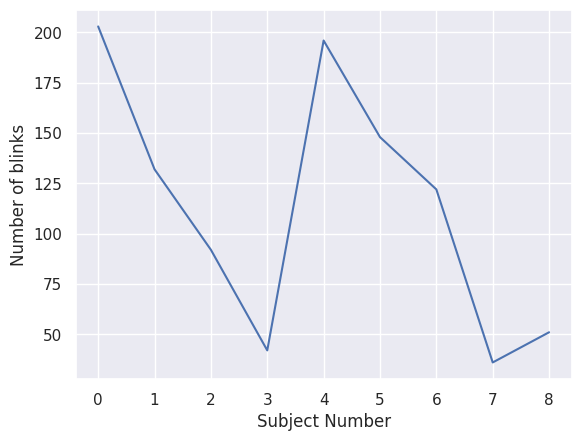

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.plot(n_blinks)
plt.xlabel("Subject Number")
plt.ylabel("Number of blinks")

print(sum(n_blinks))

In [5]:
len(n_blinks)

89

In [27]:
from functions.utils import random_sample




[2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 18,
 20,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49,
 51,
 53]

In [42]:
import pandas as pd

onsets_indc = list(blink_df[blink_df["label"]=="onset"].index)
n_onsets = len(onsets_indc)
offsets_indc = list(blink_df[blink_df["label"]=="offset"].index)
n_offsets = len(offsets_indc)

onsets_indc = random_sample(onsets_indc, np.min([n_onsets, 40]))
offsets_indc = random_sample(offsets_indc, np.min([n_offsets, 40]))

onsets_indc = np.sort(onsets_indc)
offsets_indc = np.sort(offsets_indc)

onsets = blink_df.loc[onsets_indc]
offsets = blink_df.loc[offsets_indc]

blink_df = pd.concat([onsets, offsets])

,id,label,start_t,end_t,start_ts,end_ts
2,2,onset,4.043108,4.164923,1675694197176676022,1675694197296802022
4,4,onset,8.817539,8.905349,1675694201951059022,1675694202041184022
6,6,onset,14.94901,15.009758,1675694208081693022,1675694208141818022
8,8,onset,18.10947,18.240313,1675694211244698022,1675694211374823022
10,10,onset,27.683865,27.779053,1675694220816847022,1675694220911972022
12,12,onset,28.728938,28.84292,1675694221862846022,1675694221977971022
14,14,onset,29.90889,30.048558,1675694223043970022,1675694223184095022
16,16,onset,30.743687,30.828772,1675694223879720022,1675694223964845022
18,18,onset,32.153208,32.278427,1675694225285969022,1675694225411094022
20,20,onset,34.434449,34.532377,1675694227568093022,1675694227668218022
